In [6]:
# import pathlib
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#import re
#import random
#from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_auc_score
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe


import xgboost as xgb
from sklearn.metrics import auc, accuracy_score, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV
#from string import ascii_letters
import seaborn as sns
import h5py as h5

#from string import ascii_letters

In [13]:
df =pd.read_pickle('../pickle_pd/pd_top_25.pkl')
features = ['lep_pt_2','lep_pt_1','jet_n','lep_E_1','jet_pt_0','lep_eta_0','jet_pt_1','lep_pt_0','lep_E_2','lep_eta_1','lep_phi_1','lep_phi_0',
            'lep_ptcone30_1','lep_ptcone30_0','jet_eta_0','jet_m','lep_E_0','jet_eta_1','jet_pt_2','lep_pt_3','jet_E_0','lep_charge_1','lep_charge_0','lep_E_3']

In [8]:
 X_train, X_test, y_train, y_test = train_test_split( df[features], df['label'], test_size=0.2, random_state=42)
 X_test, X_val, y_test, y_val = train_test_split( X_test, y_test, test_size=0.5, random_state=42)

In [9]:
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

In [10]:
def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation, #eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [11]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 10,
                        trials = trials)

  0%|                                          | 0/10 [00:00<?, ?trial/s, best loss=?]

/Users/ndueser/Documents/Niklas/ML_Seminar/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                
0.7789748612471433                                                                    
 10%|█▌             | 1/10 [00:45<06:53, 45.97s/trial, best loss: -0.7789748612471433]

/Users/ndueser/Documents/Niklas/ML_Seminar/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                
0.7788788385089589                                                                    
 20%|███            | 2/10 [01:39<06:41, 50.15s/trial, best loss: -0.7789748612471433]

/Users/ndueser/Documents/Niklas/ML_Seminar/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                
0.7784755430085845                                                                    
 30%|████▌          | 3/10 [02:19<05:20, 45.72s/trial, best loss: -0.7789748612471433]

/Users/ndueser/Documents/Niklas/ML_Seminar/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                
0.778552361199132                                                                     
 40%|██████         | 4/10 [03:17<05:04, 50.72s/trial, best loss: -0.7789748612471433]

/Users/ndueser/Documents/Niklas/ML_Seminar/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                
0.7793013385569703                                                                    
 50%|███████▌       | 5/10 [03:57<03:52, 46.56s/trial, best loss: -0.7793013385569703]

/Users/ndueser/Documents/Niklas/ML_Seminar/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                
0.7797046340573448                                                                    
 60%|█████████      | 6/10 [05:00<03:29, 52.33s/trial, best loss: -0.7797046340573448]

/Users/ndueser/Documents/Niklas/ML_Seminar/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                
0.7792245203664228                                                                    
 70%|██████████▌    | 7/10 [05:45<02:30, 50.06s/trial, best loss: -0.7797046340573448]

/Users/ndueser/Documents/Niklas/ML_Seminar/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                
0.779032474890054                                                                     
 80%|████████████   | 8/10 [06:40<01:43, 51.53s/trial, best loss: -0.7797046340573448]

/Users/ndueser/Documents/Niklas/ML_Seminar/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                
0.7789556566995064                                                                    
 90%|█████████████▌ | 9/10 [07:29<00:50, 50.82s/trial, best loss: -0.7797046340573448]

/Users/ndueser/Documents/Niklas/ML_Seminar/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                
0.778225883889305                                                                     
100%|██████████████| 10/10 [08:12<00:00, 49.25s/trial, best loss: -0.7797046340573448]


In [14]:
best_hyperparams

{'colsample_bytree': 0.8866580175329654,
 'gamma': 5.382611073241503,
 'max_depth': 12.0,
 'min_child_weight': 7.0,
 'reg_alpha': 68.0,
 'reg_lambda': 0.15614822770506898}

In [12]:
xgb_model=xgb.XGBClassifier(
                    n_estimators =180, max_depth = int(best_hyperparams['max_depth']), gamma = best_hyperparams['gamma'],
                    reg_alpha = int(best_hyperparams['reg_alpha']),min_child_weight=int(best_hyperparams['min_child_weight']),
                    colsample_bytree=int(best_hyperparams['colsample_bytree']))         
xgb_model.fit(X_train[features],y_train,
             eval_set = [( X_train, y_train), ( X_test, y_test)])
y_pred = xgb_model.predict(X_val[features])

[0]	validation_0-mlogloss:1.03996	validation_1-mlogloss:1.04031
[1]	validation_0-mlogloss:1.00416	validation_1-mlogloss:1.00493
[2]	validation_0-mlogloss:0.99054	validation_1-mlogloss:0.99133
[3]	validation_0-mlogloss:0.98068	validation_1-mlogloss:0.98175
[4]	validation_0-mlogloss:0.96818	validation_1-mlogloss:0.96925
[5]	validation_0-mlogloss:0.94226	validation_1-mlogloss:0.94266
[6]	validation_0-mlogloss:0.92770	validation_1-mlogloss:0.92834
[7]	validation_0-mlogloss:0.88749	validation_1-mlogloss:0.88829
[8]	validation_0-mlogloss:0.85946	validation_1-mlogloss:0.86041
[9]	validation_0-mlogloss:0.82791	validation_1-mlogloss:0.82889
[10]	validation_0-mlogloss:0.80840	validation_1-mlogloss:0.80948
[11]	validation_0-mlogloss:0.78835	validation_1-mlogloss:0.78944
[12]	validation_0-mlogloss:0.77998	validation_1-mlogloss:0.78078
[13]	validation_0-mlogloss:0.76839	validation_1-mlogloss:0.76906
[14]	validation_0-mlogloss:0.73203	validation_1-mlogloss:0.73209
[15]	validation_0-mlogloss:0.72935	

[126]	validation_0-mlogloss:0.51208	validation_1-mlogloss:0.51018
[127]	validation_0-mlogloss:0.51196	validation_1-mlogloss:0.51005
[128]	validation_0-mlogloss:0.51187	validation_1-mlogloss:0.50994
[129]	validation_0-mlogloss:0.51164	validation_1-mlogloss:0.50975
[130]	validation_0-mlogloss:0.51163	validation_1-mlogloss:0.50975
[131]	validation_0-mlogloss:0.51113	validation_1-mlogloss:0.50923
[132]	validation_0-mlogloss:0.51104	validation_1-mlogloss:0.50915
[133]	validation_0-mlogloss:0.51090	validation_1-mlogloss:0.50902
[134]	validation_0-mlogloss:0.51079	validation_1-mlogloss:0.50891
[135]	validation_0-mlogloss:0.51073	validation_1-mlogloss:0.50888
[136]	validation_0-mlogloss:0.51057	validation_1-mlogloss:0.50873
[137]	validation_0-mlogloss:0.51015	validation_1-mlogloss:0.50834
[138]	validation_0-mlogloss:0.50991	validation_1-mlogloss:0.50807
[139]	validation_0-mlogloss:0.50987	validation_1-mlogloss:0.50802
[140]	validation_0-mlogloss:0.50947	validation_1-mlogloss:0.50765
[141]	vali

In [33]:
history  = xgb_model.evals_result()

In [37]:
history.keys()

dict_keys(['validation_0', 'validation_1'])

In [44]:
history['validation_0']

OrderedDict([('mlogloss',
              [1.0399692002773844,
               1.00419866181396,
               0.9905929694253238,
               0.9807697981072296,
               0.9683387530185,
               0.9424370312609233,
               0.9279077953881256,
               0.8877055154391522,
               0.8596715273170508,
               0.8281522927193247,
               0.8086586603957341,
               0.7886323518127453,
               0.7802785871180438,
               0.7686939942614591,
               0.7323234835028886,
               0.7296653050064387,
               0.7210796791732469,
               0.7065456719139472,
               0.6998802014790566,
               0.6958727798149587,
               0.688824408178666,
               0.683929603199748,
               0.6741873208323159,
               0.6733986114337582,
               0.666424404264281,
               0.6625964438918933,
               0.6611929366711541,
               0.6603340957213669,
  

In [1]:
plt.plot(history['validation_0']['mlogloss'], label='train')
plt.plot(history['validation_1']['mlogloss'], label='test')
plt.legend()

NameError: name 'plt' is not defined

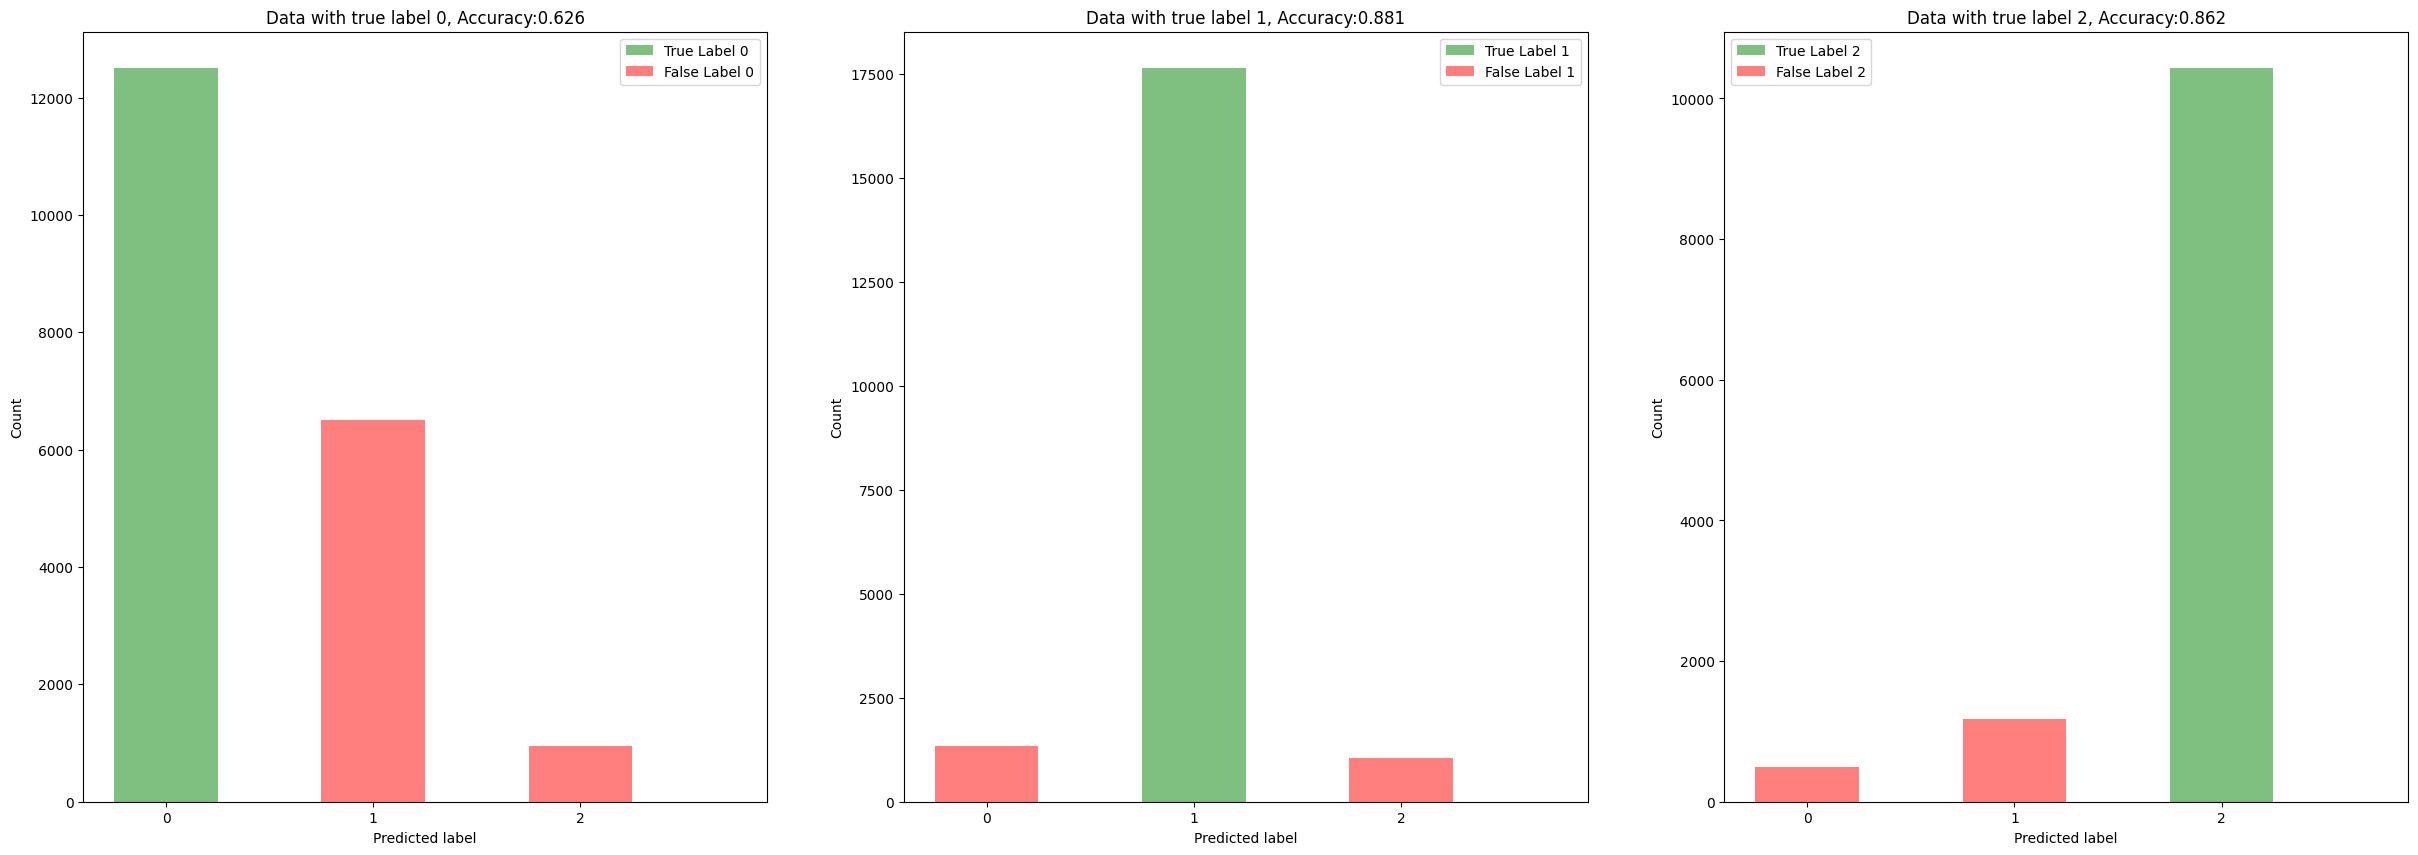

In [19]:
bins = [-0.25, 0.75, 1.75, 2.75] 
fig, ax = plt.subplots(1,3, figsize = (30,10))
for i, label in enumerate(range(3)):
    test_label = y_val[y_val==label]
    pred_label = y_pred[y_val==label]
    true_label = pred_label[pred_label == test_label]
    false_label= pred_label[pred_label != test_label]
    #print(len(false_label))
    ax[i].hist(true_label , bins = bins, histtype = 'barstacked', alpha=0.5, label='True Label ' + str(label), align = 'mid', width = 0.5, color = 'green')
    ax[i].hist(false_label, bins = bins, histtype = 'barstacked', alpha=0.5, label='False Label ' + str(label), align = 'mid', width = 0.5, color = 'red')
    #ax[i] = plt.xlabel('label')
    ax[i].set_title(f'Data with true label {i}, Accuracy:{accuracy_score(test_label, pred_label):.3f}')
    ax[i].set_xlabel(xlabel = f'Predicted label')
    ax[i].set_ylabel('Count')
    ax[i].legend()
    ax[i].set_xticks(range(3))

#plt.legend()
#plt.xlim(-0.5, 2.5)
#plt.xticks(range(3)) 